In [1]:
# Import libraries
import tensorflow as tf
import pandas as pd
import numpy as np
from tensorflow.keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
import itertools
from sklearn.metrics import confusion_matrix

In [2]:
# The data has already been sorted into training and test sets for us
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()
     

4422102/4422102 [==============================] - 0s 0us/step


In [3]:
# Show the first training example
print(f"Training sample:\n{train_data[0]}\n") 
print(f"Training label: {train_labels[0]}")

Training sample:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1  

In [4]:
# Check the shapes of our data
train_data.shape, test_data.shape


((60000, 28, 28), (10000, 28, 28))

In [5]:
# Asign a better label
x_train = train_data
y_train = train_labels
x_test = test_data
y_test = test_labels

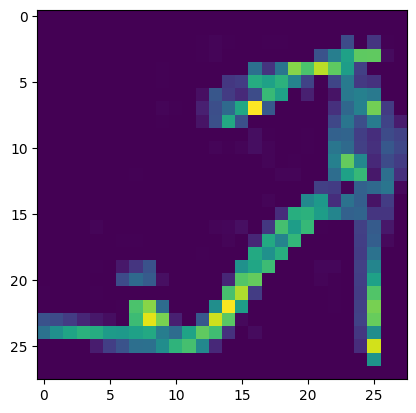

In [6]:
# Plot a single example
plt.imshow(x_train[8]);
     

In [7]:
# Create the class names
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

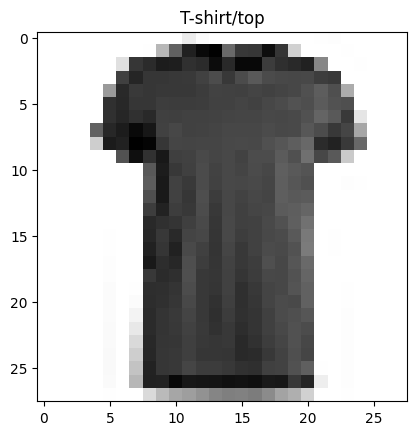

In [8]:
# Plot an example image and its label
plt.imshow(x_train[17], cmap=plt.cm.binary) # change the colours to black & white
plt.title(class_names[y_train[17]]);
     

In [9]:
# Normalize the data
x_train.min(), x_train.max() # (0,255)
x_train = x_train/255.0
x_test = x_test/255.0



In [11]:
# create the model
tf.random.set_seed(42)

# 1. Build the model
model_mnist = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

# 2. Compile the model
model_mnist.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
                    optimizer=tf.keras.optimizers.Adam(lr=0.001),
                    metrics=["accuracy"])




# 3. Fit the model

history = model_mnist.fit(x_train, 
                          y_train,
                          epochs=5,
                          validation_data = (x_test, y_test))

Epoch 1/5
1875/1875 [==============================] - 8s 3ms/step - loss: 1.5225 - accuracy: 0.4097 - val_loss: 1.2508 - val_accuracy: 0.4864
Epoch 2/5
1875/1875 [==============================] - 5s 2ms/step - loss: 1.1791 - accuracy: 0.5435 - val_loss: 1.1271 - val_accuracy: 0.5804
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 1.0717 - accuracy: 0.5864 - val_loss: 1.0411 - val_accuracy: 0.6010
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 1.0068 - accuracy: 0.5993 - val_loss: 0.9915 - val_accuracy: 0.6012
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.9596 - accuracy: 0.6182 - val_loss: 0.9594 - val_accuracy: 0.6139


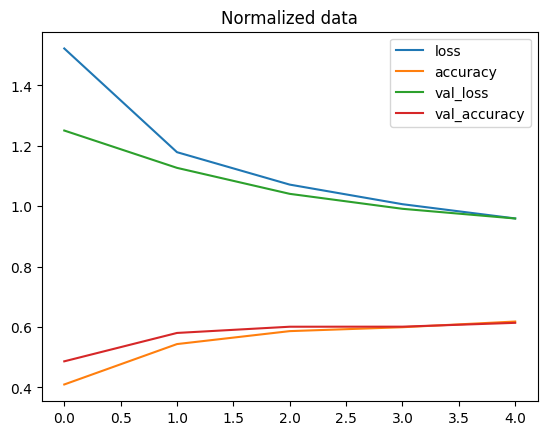

In [12]:
pd.DataFrame(history.history).plot(title="Normalized data");

In [13]:
# Prediction

y_pred = model_mnist.predict(x_test)
y_pred

313/313 [==============================] - 1s 1ms/step


array([[3.07392539e-03, 2.84859119e-03, 3.52183217e-03, ...,
        1.90616906e-01, 1.65813398e-02, 2.81043470e-01],
       [5.62839955e-02, 4.64262448e-05, 5.60757816e-01, ...,
        2.19343011e-24, 5.84943223e-07, 9.42743564e-37],
       [8.33537740e-07, 9.88709211e-01, 3.00911139e-03, ...,
        9.99550026e-11, 2.64922598e-11, 5.06897721e-24],
       ...,
       [7.61182383e-02, 8.28632255e-06, 4.83390642e-03, ...,
        6.08325217e-06, 5.82191408e-01, 5.15697539e-05],
       [1.46814768e-04, 9.28979456e-01, 2.28450131e-02, ...,
        3.02358312e-05, 4.76121585e-07, 7.12456014e-14],
       [1.14579778e-03, 5.38036367e-03, 2.64537823e-03, ...,
        6.16513252e-01, 2.11251364e-03, 1.26443915e-02]], dtype=float32)

In [15]:

# Convert all of the predictions from probabilities to labels
y_preds = y_pred.argmax(axis=1)
y_preds

array([5, 2, 1, ..., 8, 1, 7])

In [16]:
# Check out the non-prettified confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true=test_labels, 
                 y_pred=y_preds)

array([[631,   4,  78, 158,   4,   0,  93,   6,  26,   0],
       [  0, 937,   9,  22,  24,   0,   5,   2,   1,   0],
       [ 48,  23, 733,  22, 136,   0,  36,   0,   2,   0],
       [103,   4,  71, 612,  17,   4, 106,   8,  75,   0],
       [  8,  44, 658,  35, 218,   0,  37,   0,   0,   0],
       [  0,   0,   0,   1,   0, 507,   0, 398,   2,  92],
       [196,  11, 496, 127,  39,   0, 111,   1,  19,   0],
       [  0,   0,   0,   0,   0, 204,   0, 764,   0,  32],
       [ 37,   2,   7, 162,   1,  10,   4,   3, 760,  14],
       [  0,   0,   0,   1,   0, 120,   0,  11,   2, 866]])

In [ ]:
import itertools
from sklearn.metrics import confusion_matrix

# Our function needs a different name to sklearn's plot_confusion_matrix
def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15): 
  """Makes a labelled confusion matrix comparing predictions and ground truth labels.

  If classes is passed, confusion matrix will be labelled, if not, integer class values
  will be used.

  Args:
    y_true: Array of truth labels (must be same shape as y_pred).
    y_pred: Array of predicted labels (must be same shape as y_true).
    classes: Array of class labels (e.g. string form). If `None`, integer labels are used.
    figsize: Size of output figure (default=(10, 10)).
    text_size: Size of output figure text (default=15).
  
  Returns:
    A labelled confusion matrix plot comparing y_true and y_pred.

  Example usage:
    make_confusion_matrix(y_true=test_labels, # ground truth test labels
                          y_pred=y_preds, # predicted labels
                          classes=class_names, # array of class label names
                          figsize=(15, 15),
                          text_size=10)
  """  
  # Create the confustion matrix
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
  n_classes = cm.shape[0] # find the number of classes we're dealing with

  # Plot the figure and make it pretty
  fig, ax = plt.subplots(figsize=figsize)
  cax = ax.matshow(cm, cmap=plt.cm.Blues) # colors will represent how 'correct' a class is, darker == better
  fig.colorbar(cax)

  # Are there a list of classes?
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])
  
  # Label the axes
  ax.set(title="Confusion Matrix",
         xlabel="Predicted label",
         ylabel="True label",
         xticks=np.arange(n_classes), # create enough axis slots for each class
         yticks=np.arange(n_classes), 
         xticklabels=labels, # axes will labeled with class names (if they exist) or ints
         yticklabels=labels)
  
  # Make x-axis labels appear on bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Set the threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
             horizontalalignment="center",
             color="white" if cm[i, j] > threshold else "black",
             size=text_size)
     

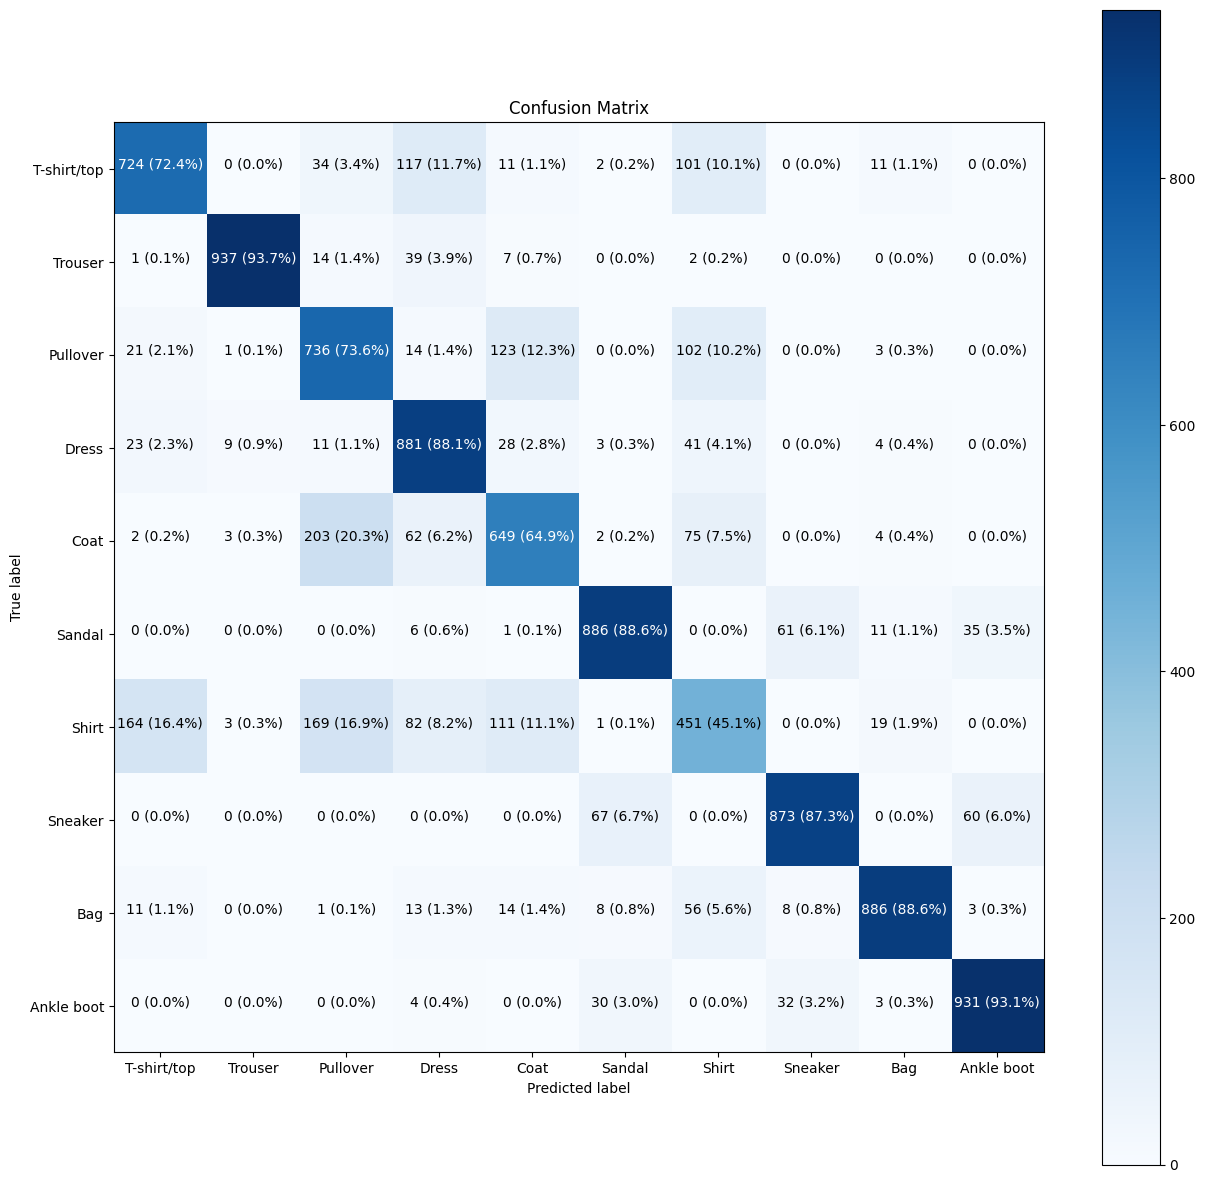

In [ ]:
# Make a prettier confusion matrix
make_confusion_matrix(y_true=test_labels, 
                      y_pred=y_preds,
                      classes=class_names,
                      figsize=(15, 15),
                      text_size=10)

Every neuron has bias vector. Each of these is paired with a weihgt matrix.

In [ ]:
# Get the patterns of a layer in our network

weights, biases = model_mnist.layers[1].get_weights() # From the fisrt hiden layer

# Shapes
weights, weights.shape

(array([[ 0.0481227 , -0.13852592, -0.07494994,  0.8573277 ],
        [-0.24550696, -0.33224723, -0.03570725,  0.61626536],
        [ 0.9993331 , -1.1420447 ,  0.00392481,  0.9615546 ],
        ...,
        [-0.48997575, -0.5077621 , -0.05952055,  0.19975494],
        [-0.5875711 , -0.4558863 , -0.02918455, -0.7993277 ],
        [ 0.57089585, -0.24773313,  0.01012752,  0.32302827]],
       dtype=float32),
 (784, 4))

In [ ]:
# Bias and biases shapes
biases, biases.shape 

(array([ 1.4562521 ,  2.6975713 , -0.01625487,  2.8912835 ], dtype=float32),
 (4,))